In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%reload_ext autoreload
from utils import load_images
from features import extract_features, load_features, save_features

images_paths, images = load_images(True)
images_paths.head()

,image_name,label,path,train,label_id,image_id
0,image25107.jpg,apparel,images/apparel/image25107.jpg,True,9,0
1,image26799.jpg,apparel,images/apparel/image26799.jpg,True,9,1
2,image23088.jpg,apparel,images/apparel/image23088.jpg,True,9,2
3,image0421.jpg,apparel,images/apparel/image0421.jpg,True,9,3
4,image15994.jpg,apparel,images/apparel/image15994.jpg,True,9,4


In [3]:
def orb_descriptor(image):
    orb = cv2.ORB_create(nfeatures = 50, scoreType = cv2.ORB_HARRIS_SCORE, WTA_K = 4)
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, descs = orb.detectAndCompute(img, None)
    return descs

# Convertir las imágenes a escala de grises y aplicar SIFT en el subconjunto de imágenes
descriptors, index = extract_features(orb_descriptor, images, min_features=3, progress = True)
print("Tamaño de  descriptores:", descriptors.shape[1])
print("Número de  descriptores:", descriptors.shape[0])
print("Número Máximo de Descriptores Por Imágen :", pd.value_counts(index).max())
print("Número Medio  de Descriptores Por Imágen :", pd.value_counts(index).mean().round(0).astype(int))
print("Número Mínimo de Descriptores Por Imágen :", pd.value_counts(index).min())

save_features(descriptors, index, images_paths, "ORB")
#descriptors = np.concatenate(descriptors)


  0%|          | 0/550 [00:00<?, ?it/s]

Tamaño de  descriptores: 32
Número de  descriptores: 17102
Número Máximo de Descriptores Por Imágen : 35
Número Medio  de Descriptores Por Imágen : 31
Número Mínimo de Descriptores Por Imágen : 3


In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter


# Crear un modelo de k-NN
knn_model = NearestNeighbors(n_neighbors=30)  # Buscar los 5 vecinos más cercanos
knn_model.fit(lista_desciptores_aplanado)  # Ajustar el modelo a los descriptores

# Función para encontrar los vecinos más cercanos para un descriptor dado
def find_nearest_neighbors(descriptor, k = 10):
    descriptor_flat = descriptor.flatten()
    # Encontrar los índices y distancias de los vecinos más cercanos
    distances, indices = knn_model.kneighbors([descriptor_flat], k)  # Obtener k vecinos más cercanos
    return distances, indices

# Ejemplo: Encontrar vecinos más cercanos para el primer descriptor en la primera imagen
contador = Counter()
lista = []
print(len(descriptor_busqueda[0]))
for descriptor in descriptor_busqueda[0]:
    distances, indices = find_nearest_neighbors(descriptor, 20)
    lista.extend([index[indice] for indice in indices[0]])

print(len(lista))
Counter(lista).most_common(10)
# Imprimir los índices de los vecinos más cercanos y sus distancias
#print("Índices de los vecinos más cercanos:", indices)
#print("Distancias a los vecinos más cercanos:", distances)


In [4]:
meta, descriptors = load_features("features/SIFT.csv")
descriptors.shape

(73700, 128)

In [5]:
matcher = cv2.BFMatcher_create()
feat = descriptors[:5, :].reshape(-1, 128) #.reshape(, -1)
mat = matcher.knnMatch(feat, descriptors[::-1], 50)

In [6]:
mat[0][1].distance, mat[0][2].distance

(137.1641387939453, 170.80982971191406)

In [34]:
%reload_ext autoreload
%autoreload 2
from matching import minmin_retrival

ret = minmin_retrival(descriptors[:100, :], descriptors[90:, :], meta.iloc[90:, :].reset_index())

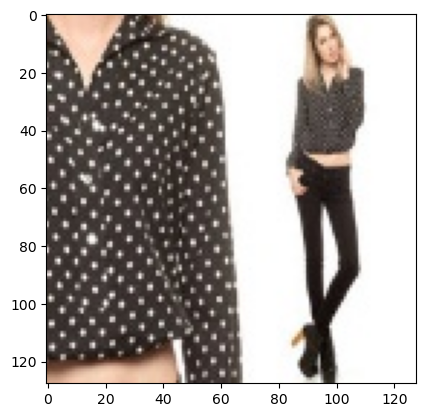

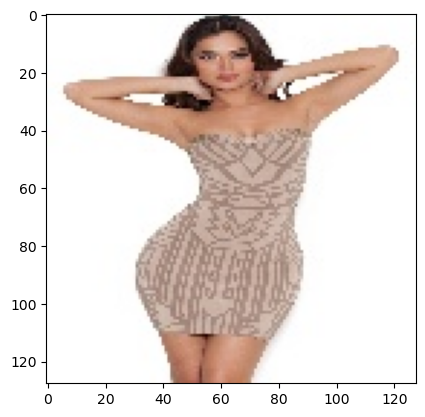

In [33]:
plt.imshow(images[ret])
plt.show()
plt.imshow(images[meta.iloc[90, 0]])